# Group Project 22

# Determining If Fatal US Police Shooting Decisions are Racially Motivated for African Americans
*Group Members: Angelique Clara Hanzell, Jack Parkinson, Edward Liang, Vamsi Nadella*

## Question

Does race and threat level determine the severity of force used by US Law Enforcement?

## 1. Introduction

Police use of deadly force is an ongoing controversial topic that has a recurring theme of racial bias. Many reports have highlighted a racial disparity in police shootings, including a report by Yale University that found  that Black Americans from  2015-2020  were killed by police 2.6 times more than white people (Belli, 2021). American police agencies often respond to these claims with the supreme court case, Tennessee vs. Garner (Tennessee v. Garner, 1985), that ruled police officers have the legality to use deadly force if there is a threat level present. Therefore this begs the question, can the disproportionate killing of black Americans be explained through a higher rate of threat level of police shooting victims?

In our project, we will use the US Police Shootings dataset that is attained through GitHub. This dataset gives us insight into every fatal shooting that has happened in the United States by a police officer. Our group is interested in the relationship between police shootings ( `manner_of_death`) in relation to race (`race`) and level of threat, (`threat_level`). Analyzing these categories may give us insights into how race and level of threat could be associated with the manner of death of the person. More specifically, we will focus on the White and Black race. Column names used for data analysis with their descriptions: 
    
> `manner_of_death`: Manner of Death
   > - `shot` 
   > - `shot and Tasered`

> `race`: Race
   > - `W`: White
   > - `B`: Black

> `threat_level`: Threat Level
   > - `attack`: direct and immediate threat to life including armed or attacking police officers
   > - `other`: all remaining cases


## 2. Preliminary Results

In [3]:
library(tidyverse)
library(infer)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



- We started off by reading the dataset that we got from Github, which is referenced on the `Dataset` on the end of the final report.

In [7]:
# Reading the data from the web
ShootingData <- read.csv('https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv')

head(ShootingData)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
6,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True


- Since we are interested in seeing if the US Police shooting decisions are racially motivated for African Americans, we then wrangle the dataset by filtering out the parameters of interest, in this case it would be filtering the race (`race`) of White and Black people, filtering threat level (`threat_level`) that is either falls under `attack` or `other`, and selecting the columsn that we are interested in, including manner of death (`manner_of_death`), race (`race`), and threat level (`threat_level`).

In [8]:
# Filtering the data for parameters of interest
ShootingPop <- ShootingData %>%
    filter(race %in% c('W', 'B'),
          threat_level != 'undetermined') %>% 
    select(manner_of_death, race, threat_level)

head(ShootingPop)

,manner_of_death,race,threat_level
,<chr>,<chr>,<chr>
1,shot,W,attack
2,shot,W,attack
3,shot,W,attack
4,shot,W,attack
5,shot,W,other
6,shot,B,attack


- First, we will start with `ShotOnlyProps` where we are grouping by race and threat level from the `ShootingPop` dataset that we tidied in the previous section, and finding the proportion of manner of death that is categorized as `shot`.

In [32]:
ShotOnlyProps <- ShootingPop %>% 
    group_by(race, threat_level) %>% 
    summarise(proportion = sum(manner_of_death == 'shot')/n())

ShotOnlyProps

`summarise()` has grouped output by 'race'. You can override using the `.groups` argument.



race,threat_level,proportion
<chr>,<chr>,<dbl>
B,attack,0.9614004
B,other,0.9178357
W,attack,0.9642685
W,other,0.9297030


- Next, similarly to the previous one, we made another variable called `ShotAndTasedProps` where instead of `shot`, we will be observing the proportion of manner of death that falls under the category `shot and Tasered`.

In [33]:
ShotAndTasedProps <- ShootingPop %>% 
    group_by(race, threat_level) %>% 
    summarise(proportion = sum(manner_of_death == 'shot and Tasered')/n())

ShotAndTasedProps

`summarise()` has grouped output by 'race'. You can override using the `.groups` argument.



race,threat_level,proportion
<chr>,<chr>,<dbl>
B,attack,0.03859964
B,other,0.08216433
W,attack,0.03573153
W,other,0.07029703


-  Next we will be displaying a graph for visualization and tables associated with proportions. `Figure 1.1` will display the proportion of threat level `attack` proportions based on race, whereas `Figure 1.2` will display the proportion of threat level `other` proportions based on race.

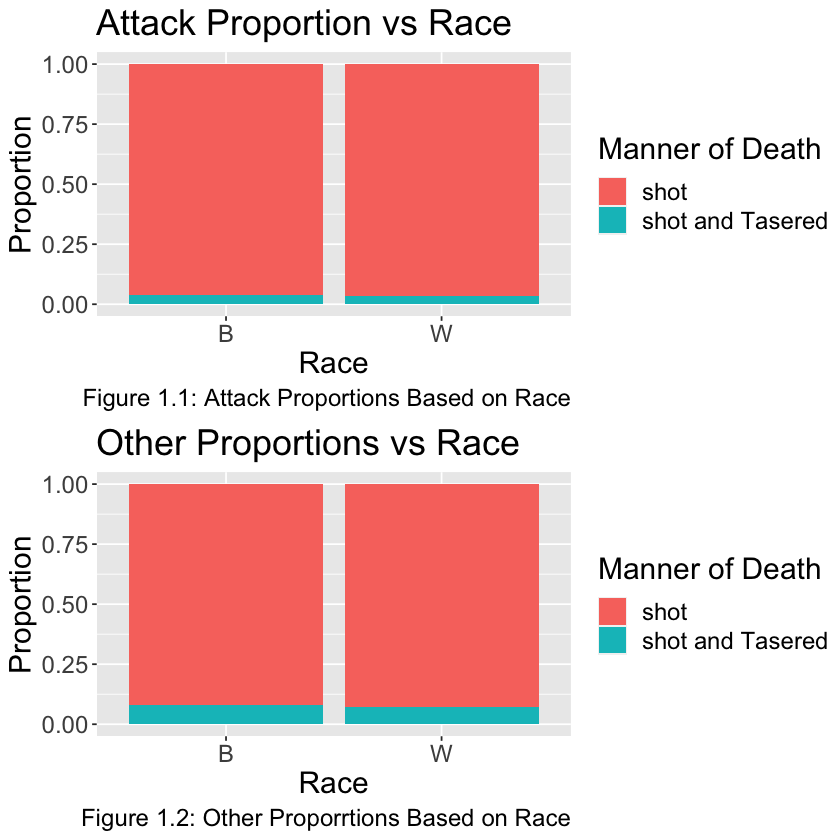

In [35]:
PlottingAttack <- ShootingPop %>%
    filter(threat_level == 'attack') %>% 
    group_by(race) %>% 
    ggplot(aes(x = race, fill = manner_of_death)) +
    labs(x = 'Race', fill = 'Manner of Death', y = 'Proportion', 
        caption = "Figure 1.1: Attack Proportions Based on Race") +
    geom_bar(position = "fill") +
    ggtitle("Attack Proportion vs Race") +
    theme(text = element_text(size = 18))

PlottingOther <- ShootingPop %>% 
    filter(threat_level == 'other') %>% 
    group_by(race) %>% 
    ggplot(aes(x = race, fill = manner_of_death)) +
    labs(x = 'Race', fill = 'Manner of Death', y = 'Proportion', 
        caption = "Figure 1.2: Other Proporrtions Based on Race") +
    geom_bar(position = "fill") +
    ggtitle("Other Proportions vs Race") +
    theme(text = element_text(size = 18))

plot_grid(PlottingAttack, PlottingOther, nrow = 2)

## 3. Methods: Plan

Using our knowledge of inferential methods we are able to get an early sense of what the proportions look like for fatal police shooting decisions in relation to race and sense of threat. With both a table showing the numerical proportions and a bar graph providing an effective visualization, we can easily begin to make some interpretations about what the population data may look like. 

We are not certain whether or not the data may present some kind of bias (whether it be representing some US states more than others or mistakenly leaving out certain observations). In addition, with the threat level being only “attack” or “other”, it severely limits our inference as it heavily overlooks the severity of the crime (e.g. if it was labelled “attack”, was the attacker using a knife or gun? The weapon of choice may play heavily in the decision of “shot” vs. “shot and Tasered”). Lastly, different states are known to have a more traditional political stance than others. Some states are more conservative whereas others are more liberal. Conservative states tend to be more opposed to people of colour than liberal states. Therefore, we cannot fully rely only on the dataset to make an accurate estimation about the population. 


### Hypothesis Testing:

$p_1$ and $p_2$ represent the proportion for black people and white people that were shot deemed 'other' respectively

- $H_0: p_1 - p_2 = 0$ 

- $H_A: p_1 - p_2 \neq 0$

By doing a hypothesis test, we will be able to see if the difference in proportions will be significant enough to reject the null hypothesis.

### Confidence Interval:

We will obtain a confidence interval using bootstrapping to find a plausible range of values for our population proportions.

### Scaled Parameter:

We will estimate the population standard deviation using bootstrapping to generate a confidence interval to find a suitable range of values. The z-score of the point estimate can provide a useful metric for how well our results generalize to the population.

## 4. Methods and Results
#### Wrangling Data into a dataframe of threat level: `other`.
- We will start by filtering our dataset to only include `threat_level == 'other'`

In [35]:
ShootingOther <- ShootingPop %>% 
    filter(threat_level == 'other')

head(ShootingOther)

,manner_of_death,race,threat_level
,<chr>,<chr>,<chr>
1,shot,W,other
2,shot,B,other
3,shot,W,other
4,shot,B,other
5,shot and Tasered,W,other
6,shot,B,other


#### Finding the 95% CI of the difference in proportions:

In [36]:
set.seed(1)


prop_diffs <-
   ShootingOther %>% 
   specify(formula = manner_of_death ~ race, success = 'shot') %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 1000, type = "permute") %>% 
   calculate(stat = "diff in props", order = c('B', 'W'))



prop_diffs_ci <- 
    prop_diffs %>% 
    summarise(lower_ci = quantile(stat, 0.025), upper_ci = quantile(stat, 0.975))

prop_diffs_ci


lower_ci,upper_ci
<dbl>,<dbl>
-0.02683783,0.02705609


As we can see in the confidence interval, we can conclude with 95% confidence that our true difference in proportion ranges from (-0.02683783, 0.02705609). As we can see, this range also includes the value 0 which does agree with our null hypothesis: there is no difference between the proportion of black people being shot and white people being shot. As a result, the confidence interval allows us to not rule out the null hypothesis entirely.

#### Graphing the confidence interval of the difference in proportions:

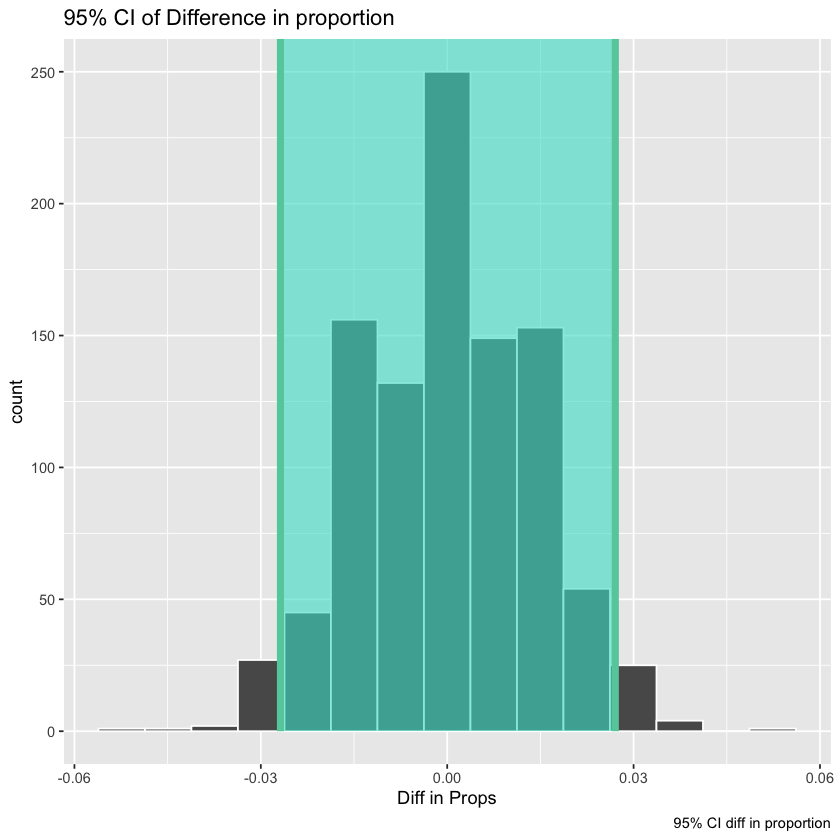

In [37]:
mean_flow_ci_plot <- visualize(prop_diffs) + 
  shade_confidence_interval(endpoints = prop_diffs_ci) + 
  labs(x = "Diff in Props", caption = "95% CI diff in proportion") + 
    ggtitle('95% CI of Difference in proportion')


mean_flow_ci_plot

#### Calculating the P-value for the difference in proportions:

- First, we will find the observed difference in proportions for Black And White that were shot:

In [38]:
obs_diff_prop <- ShootingOther %>% 
  specify(formula = manner_of_death ~ race, success = 'shot')  %>% 
  calculate(stat = 'diff in props', order = c('B', 'W')) 

obs_diff_prop

stat
<dbl>
-0.0118673


- Now calculate the p-value using a bootstrap method with the `obs_diff_prop` above.

In [39]:
set.seed(1)

Shooting_pValue <- ShootingOther %>% 
    specify(formula = manner_of_death ~ race, success = 'shot') %>% 
    hypothesize(null = 'independence') %>% 
    generate(type = 'permute', reps = 1000) %>% 
    calculate(stat = 'diff in props', order = c('B', 'W')) %>% 
    get_p_value(obs_diff_prop, direction = 'both')

Shooting_pValue

p_value
<dbl>
0.464


- Finally, visualize the p-value:

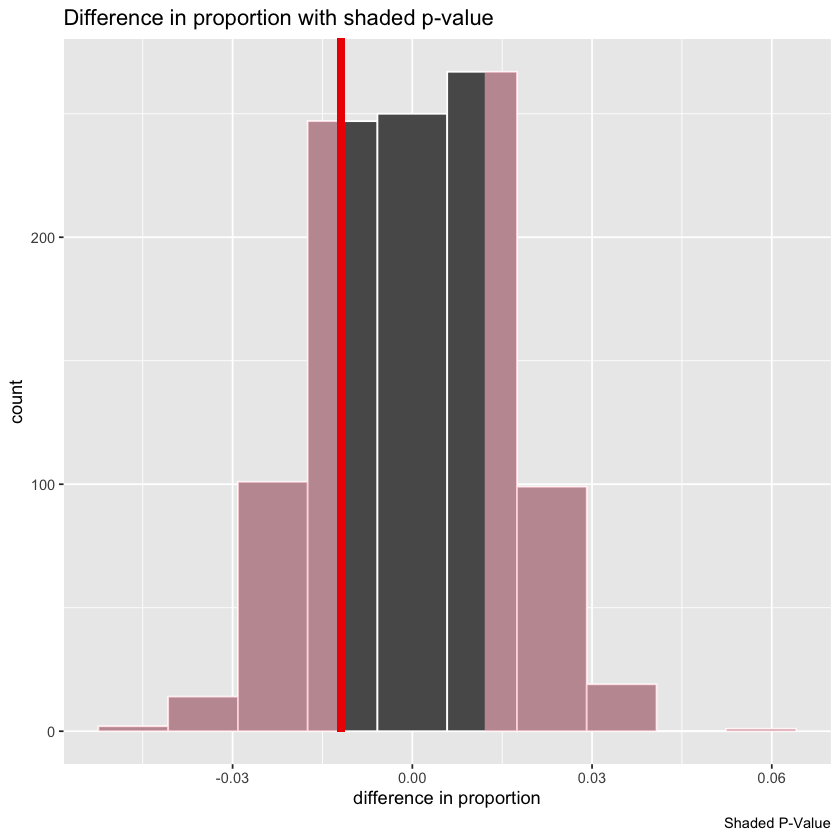

In [40]:
visualize(prop_diffs, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_prop, direction = "both") + 
labs(x='difference in proportion', caption = "Shaded P-Value") + ggtitle('Difference in proportion with shaded p-value')

## Scaled Parameter: SD / Z-point estimate

In [41]:
z_hat <- ShootingOther %>% 
  specify(manner_of_death ~ race, success = "shot") %>%
  calculate(stat = "z", order = c('B', 'W'))
z_hat

stat
<dbl>
-0.8273709


In order to analyze the standard error, we decided to estimate it using the Z-point estimate as it is built into the infer package functions. Our z-hat represents the proportion of white people being shot subtracted from the proportion of black people shot and it resulted in a value of -0.8273709. This number implies the standard error of the proportion of black people being shot is smaller than white people being shot. As an interpretation, we can say there is more variability within `manner_of_death == ‘shot’` when `race == ‘W’` than when `race == ‘B’`

### SD / Z-point Estimate Confidence Interval:

In [34]:
boot_dist <- ShootingOther %>%
  specify(manner_of_death ~ race, success = "shot") %>%
  generate(reps = 1000, type = "bootstrap") %>% 
  calculate(stat = "z", order = c('B', 'W'))

percentile_ci <- get_ci(boot_dist)
percentile_ci

lower_ci,upper_ci
<dbl>,<dbl>
-2.75333,1.233812


Like before, we created a 95% confidence interval for finding the true difference in Z-point estimates. Our values ranged from (-2.973388, 1.160917) which also gives a possibility of having no difference in the variability of each race (we are 95% confident in making this claim)! 

### Visualizing Z point estimate with Confidence Interval:

ERROR: Error in +ggtitle("95% CI of Z test statistc"): invalid argument to unary operator


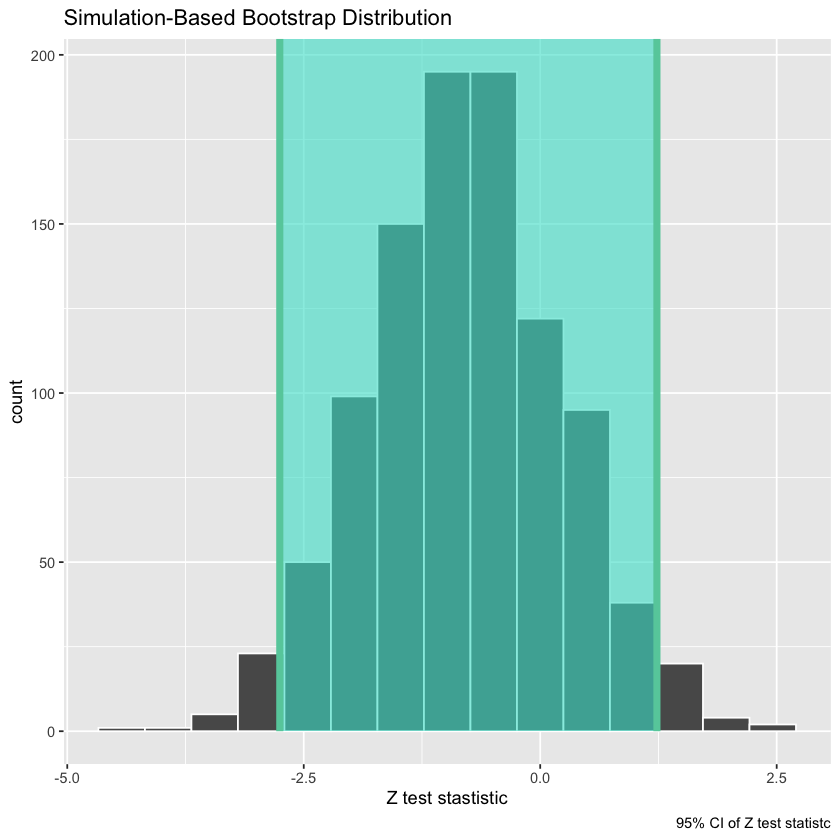

In [42]:
visualize(boot_dist) +
  shade_confidence_interval(endpoints = percentile_ci) + labs(x = 'Z test stastistic', caption = '95% CI of Z test statistc') 
 +ggtitle('95% CI of Z test statistc')

### Statistic Summary Table:

In [43]:
df <- data.frame(Name = c("Sample Diff in Props", "Diff in Prop 95% CI", "p_value", "Z sample test statistic", "Z test statistic 95% CI"),
                Value = c(-0.0119, '[-0.0268, 0.0271]', 0.464, -0.827, '[-2.973, 1.161]'))
t(df)

Name,Sample Diff in Props,Diff in Prop 95% CI,p_value,Z sample test statistic,Z test statistic 95% CI
Value,-0.0119,"[-0.0268, 0.0271]",0.464,-0.827,"[-2.973, 1.161]"


- In our analysis, we used the method of **bootstrapping**. We believe both methods will give us similar results since our dataset is large enough to use asymptotics, and cost-effective enough to use bootstrapping. 
- In our scenario, we believe bootstrapping (simulated-based analysis) was better as it allowed us to see what was happening in our code. Not only that but a big advantage of bootstrapping is the absence of having to check for conditions and make assumptions. 
- If our dataset ended up not fitting the requirements of the checks, our estimates would be inaccurate and possibly lead to a false conclusion. However, bootstrapping can be used anytime and guarantees similar results so when we had the option to use it, we did. Therefore, we say that bootstrapping is more trustworthy than using asymptotics for our analysis.

## 5. Discussion

From our results, we can see that there is definitely still the possibility of there being no difference in the proportion of black people shot compared to the proportion of white people being shot. This certainly allows for the possibility of there being little to no racial discrimination in whether a person is shot based on their race. Contrary to what we initially believed (that there was, in fact, a difference), our results tell us a whole different story. So why is it that the general consensus of the youth points to there still being racial discrimination?

A possible explanation: In today’s age, social media dominates our entire lives. Almost everything is covered by the media and is made to be as “attention-seeking” as possible. Back in June 2020, the Black Lives Matter movement trended over every social media platform which made users only see one specific story. News articles covered it, people began reposting it on their own social media accounts, and everyone only saw this one story of George Floyd. Then, users began bringing up other stories of other cases of racial discrimination such as Breonna Taylor. This ultimately painted law enforcement officers as the “villains”. However, does it mean all officers are racially biased? Absolutely not! There are very few times where the news posts about cases where police officers treat people of colour nicely and consider other peaceful options before using lethal weapons.  These few cases could ultimately be some outlier cases that just had enormous attention because the news only reported it for the “attention”. Based on a majority of cases of law enforcement encounters with people of colour, our findings suggest there is no difference at all.

Is it possible that our findings are wrong too? Absolutely. Again, our findings are only based on one specific sample/dataset found on the web. <b> There is no definite way of knowing how the dataset was collected and if there were any “malicious intent” behind the collection. <b> 
    
But with certainty, we can ensure our results, alongside the result brought by Johnson, Terrill, and Cesario (reference #3), reject the possibility of no racial discrimination among American officers being entirely thrown out of the question. 

Now, with our findings complete, we can revisit the questions we made earlier and make some modifications:
> - Why does police racial discrimination feel so prevalent in today’s modern age when the data says otherwise?

> - How can we help bring knowledge of racial discrimination to the youth without encouraging them to blame law enforcement as a whole (blaming both good officers and bad officers)?

> - Will we ever be able to reach a time where police racial discrimination is no longer mentioned on social media platforms?

## 6. Conclusion

In the dataset that we considered, there might be some misclassifications of at least one of the columns where the people are ‘shot and tasered’ but they were mislabeled as only ‘shot’. So, we actually never know the exact number of people who were ‘shot and tasered’ and ‘shot’.

Since the P-value (which is 0.464) is larger than the 𝛼 (which is 0.05), then we fail to reject the Null Hypothesis, and conclude that there is not sufficient evidence to indicate a difference in the proportions of the threat level “other” between the Black and White people who were shot to death by law enforcement.

## 7. References


1. Belli, B. (2021, April 12). Racial  Racial disparity in police shootings unchanged over 5 years. Yale News. Retrieved July 25, 2022, from https://news.yale.edu/2020/10/27/racial-disparity-police-shootings-unchanged-over-5-years 

2. Cesario, J., Johnson, D. J., & Terrill, W. (2019). Is There Evidence of Racial Disparity in Police Use of Deadly Force? Analyses of Officer-Involved Fatal Shootings in 2015–2016. Social Psychological and Personality Science, 10(5), 586–595. https://doi.org/10.1177/1948550618775108

3. Williams, H. E., Reinhard, D., & Oriola, T. B. (2021). Fatal officer involved shootings following the use of TASER conducted energy weapons. The Police Journal. https://doi.org/10.1177/0032258X211030322


### Dataset
https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv